In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report

In [2]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


# LSTM
This section loads our trained LSTM and then outputs a confusion matrix, accuracy, F-1 scores, precision, and recall

In [3]:
from tensorflow.keras.models import load_model

# Replace 'path_to_my_model.h5' with the path to your H5 file
lstm_model = load_model('../saved_models/lstm_saved.h5')

In [4]:
df = pd.read_csv('../data/af_dataset.csv')

for i in range(26):
    df[df.columns[i]] = df[df.columns[i]].astype('float64')

# get info for columns
df.info()

X = df.drop(columns='ritmi')
y = df['ritmi']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 1234)
X = df.drop(columns = ['ritmi','heart_axis','pacemaker','second_opinion','strat_fold','validated_by','validated_by_human'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319176 entries, 0 to 4319175
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   I                   float64
 1   II                  float64
 2   III                 float64
 3   aVF                 float64
 4   aVR                 float64
 5   aVL                 float64
 6   V1                  float64
 7   V2                  float64
 8   V3                  float64
 9   V4                  float64
 10  V5                  float64
 11  V6                  float64
 12  ritmi               float64
 13  age                 float64
 14  sex                 float64
 15  height              float64
 16  weight              float64
 17  nurse               float64
 18  site                float64
 19  device              float64
 20  heart_axis          float64
 21  validated_by        float64
 22  second_opinion      float64
 23  validated_by_human  float64
 24  pacemaker           floa

In [5]:
# import essential libraries
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, mean_absolute_error
import warnings
from tensorflow.keras.models import Sequential
warnings.filterwarnings('ignore')
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout,MaxPooling1D,LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import layers

In [6]:
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1], 1)

y_test_old = y_test.copy()
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train.shape[1]

3

In [7]:
lstm_pred_result = lstm_model.predict(X_test)

33744/33744 [==============================] - 296s 9ms/step


In [8]:
final_pred_lstm = [np.argmax(i) for i in lstm_pred_result]
print(classification_report(y_test_old,final_pred_lstm))

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88    335792
         1.0       0.82      0.93      0.87    267846
         2.0       0.92      0.88      0.90    476156

    accuracy                           0.89   1079794
   macro avg       0.88      0.89      0.88   1079794
weighted avg       0.89      0.89      0.89   1079794



<Axes: >

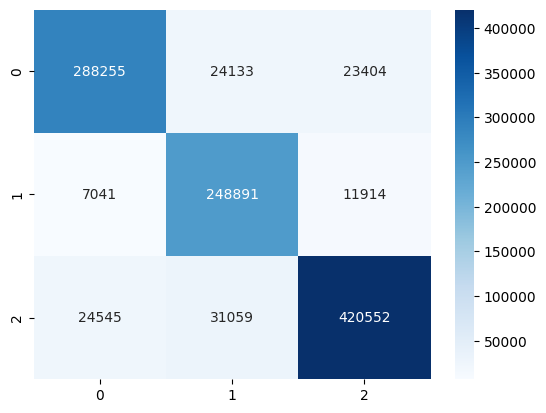

In [9]:
# Confusion Matrix
cm = confusion_matrix(y_test_old, final_pred_lstm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Logistic Regression
This section trains our Logistic Regression Model and then outputs a confusion matrix, accuracy, F-1 scores, precision, and recall

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn import datasets

In [11]:
df = pd.read_csv('../data/af_dataset.csv')

In [12]:
for i in range(26):
    df[df.columns[i]] = df[df.columns[i]].astype('float64')

# get info for columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4319176 entries, 0 to 4319175
Data columns (total 26 columns):
 #   Column              Dtype  
---  ------              -----  
 0   I                   float64
 1   II                  float64
 2   III                 float64
 3   aVF                 float64
 4   aVR                 float64
 5   aVL                 float64
 6   V1                  float64
 7   V2                  float64
 8   V3                  float64
 9   V4                  float64
 10  V5                  float64
 11  V6                  float64
 12  ritmi               float64
 13  age                 float64
 14  sex                 float64
 15  height              float64
 16  weight              float64
 17  nurse               float64
 18  site                float64
 19  device              float64
 20  heart_axis          float64
 21  validated_by        float64
 22  second_opinion      float64
 23  validated_by_human  float64
 24  pacemaker           floa

In [13]:
X = df.drop(columns='ritmi')
y = df['ritmi']
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size = 0.25, random_state = 1234)
X = df.drop(columns = ['ritmi','heart_axis','pacemaker','second_opinion','strat_fold','validated_by','validated_by_human'])

In [14]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix

X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [15]:
# Standardizing the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

LogisticRegression()

In [17]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

from sklearn.metrics import f1_score, confusion_matrix

f1 = f1_score(y_test, y_pred, average=None)
print(f'F1 Score: {f1}')

cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

from sklearn.metrics import f1_score, confusion_matrix, precision_score, recall_score


# Calculate precision and recall
precision = precision_score(y_test, y_pred, average=None)
recall = recall_score(y_test, y_pred, average=None)

print(f'Precision: {precision}')
print(f'Recall: {recall}')

Accuracy: 0.47919325352798775
F1 Score: [0.22466129 0.46197226 0.58629098]
Confusion Matrix:
[[ 49821  68213 217758]
 [ 20129 131727 115990]
 [ 37779 102495 335882]]
Precision: [0.462466   0.43555475 0.50159342]
Recall: [0.14836863 0.49180126 0.70540327]


# MLP
This section defines our custom MLP class and then loads our trained model and outputs a confusion matrix, accuracy, F-1 scores, precision, and recall

In [22]:
import torch.nn as nn

class SimpleMLP(nn.Module):
    def __init__(self, input_size, output_size):
        super(SimpleMLP, self).__init__()
        self.fc1 = nn.Linear(input_size, 128)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, output_size)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x



In [23]:
import torch

# Load the entire model directly
model_mlp = torch.load('../saved_models/simple_mlp_model.pth')

# Put the model in evaluation mode
model_mlp.eval()


SimpleMLP(
  (fc1): Linear(in_features=25, out_features=128, bias=True)
  (relu): ReLU()
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=3, bias=True)
)

In [25]:
with torch.no_grad():
    outputs = model_mlp(X_test_tensor)
    _, predicted = torch.max(outputs, 1)

from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Calculate precision, recall, and other metrics
report = classification_report(y_test_tensor.numpy(), predicted.numpy(), target_names=["SR", "AF", "VA"])
print(report)

# Convert to numpy arrays for sklearn compatibility
true_labels = y_test_tensor.numpy()
predicted_labels = predicted.numpy()

# Confusion Matrix
conf_matrix = confusion_matrix(true_labels, predicted_labels)
print("Confusion Matrix:\n", conf_matrix)

# F1 Score
f1 = f1_score(true_labels, predicted_labels, average='macro')  #
print("F1 Score:", f1)

              precision    recall  f1-score   support

          SR       0.81      0.65      0.72    335792
          AF       0.71      0.77      0.74    267846
          VA       0.74      0.80      0.77    476156

    accuracy                           0.75   1079794
   macro avg       0.75      0.74      0.74   1079794
weighted avg       0.75      0.75      0.75   1079794

Confusion Matrix:
 [[219879  32227  83686]
 [ 12350 205774  49722]
 [ 39064  53870 383222]]
F1 Score: 0.7438894493686522


# Transformer Unweighted

This section trains our Logistic Regression Model and then outputs a confusion matrix, accuracy, F-1 scores, precision, and recall

In [31]:
ecg_tensor = torch.load('transformer_data/output_file.pt')
print(ecg_tensor.shape)
ecg_tensor = ecg_tensor.view(6428, 700, 12)

torch.Size([6428, 8400])


In [30]:
# labels_tensor = torch.load('transformer_data/labels_updated.pt')
# demo_tensor = torch.load('transformer_data/other_features_file_encoded.pt')
labels_tensor = torch.load('transformer_data/labels.pt')
demo_tensor = torch.load('transformer_data/other_features_file.pt')
print(labels_tensor.shape)
print(demo_tensor.shape)
new_dtype = torch.float32
demo_tensor = demo_tensor.to(dtype=new_dtype)
demo_tensor.shape

torch.Size([6428])
torch.Size([6428, 70])


torch.Size([6428, 70])

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=700):  # Change max_len to 8388
        super(PositionalEncoding, self).__init__()
        self.encoding = self._generate_positional_encoding(d_model, max_len)

    def _generate_positional_encoding(self, d_model, max_len):
        position = torch.arange(0, max_len).unsqueeze(1).float()
        div_term = torch.exp(torch.arange(0, d_model, 2).float() * -(torch.log(torch.tensor(10000.0)) / d_model))
        pe = torch.zeros((max_len, d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        return pe

    def forward(self, x):
        result = x + self.encoding[:, :x.size(1)].detach()
        return result

class TransformerBlock(nn.Module):
    def __init__(self, d_model, nhead, ff_dim, dropout=0.1):
        super(TransformerBlock, self).__init__()
        self.self_attn = nn.MultiheadAttention(d_model, nhead)
        self.dropout_attn = nn.Dropout(dropout)
        self.norm1 = nn.LayerNorm(d_model)

        self.ffn = nn.Sequential(
            nn.Linear(d_model, ff_dim),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(ff_dim, d_model)
        )
        self.dropout_ffn = nn.Dropout(dropout)
        self.norm2 = nn.LayerNorm(d_model)

    def forward(self, x):
        attn_output, _ = self.self_attn(x, x, x)
        x = x + self.dropout_attn(attn_output)
        x = self.norm1(x)
        ffn_output = self.ffn(x)
        x = x + self.dropout_ffn(ffn_output)
        x = self.norm2(x)
        return x

class TransformerClassifier(nn.Module):
    def __init__(self, input_size, dem_size, d_model, nhead, ff_dim, num_transformer_blocks, mlp_units, dropout=0.1):
        super(TransformerClassifier, self).__init__()
        self.embedding = nn.Linear(input_size, d_model)
        self.embedding_dem = nn.Linear(dem_size, d_model)
        self.positional_encoding = PositionalEncoding(d_model)
        self.transformer_blocks = nn.ModuleList(
            [TransformerBlock(d_model, nhead, ff_dim, dropout) for _ in range(num_transformer_blocks)]
        )
        self.global_avg_pooling = nn.AdaptiveAvgPool1d(1)
        self.mlp = nn.Sequential(
            nn.Linear(d_model, mlp_units),
            nn.ReLU(),
            nn.Dropout(dropout),
            nn.Linear(mlp_units, 3)
        )

    def forward(self, x, x_dem):
        print(x.shape)
        x = self.embedding(x)
        x = self.positional_encoding(x)
        x_dem = self.embedding_dem(x_dem)
        x_dem = x_dem.unsqueeze(1)
        x = torch.cat([x, x_dem], dim=1)
        for block in self.transformer_blocks:
            x = block(x)
        x = self.global_avg_pooling(x.permute(0, 2, 1)).squeeze(2)
        x = self.mlp(x)
        return F.softmax(x, dim=1)


In [41]:
input_size = 12
dem_size = 70
sequence_length = 700
model_unw = TransformerClassifier(input_size=input_size, dem_size = dem_size, d_model=256, nhead=1, ff_dim=512, num_transformer_blocks=1, mlp_units=64, dropout=0.25)


# Assuming the path is correct
state_dict = torch.load('../saved_models/transformer_model.pth', map_location=torch.device('cpu'))
model_unw.load_state_dict(state_dict)
model_unw.eval()


TransformerClassifier(
  (embedding): Linear(in_features=12, out_features=256, bias=True)
  (embedding_dem): Linear(in_features=70, out_features=256, bias=True)
  (positional_encoding): PositionalEncoding()
  (transformer_blocks): ModuleList(
    (0): TransformerBlock(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (dropout_attn): Dropout(p=0.25, inplace=False)
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (ffn): Sequential(
        (0): Linear(in_features=256, out_features=512, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.25, inplace=False)
        (3): Linear(in_features=512, out_features=256, bias=True)
      )
      (dropout_ffn): Dropout(p=0.25, inplace=False)
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
  )
  (global_avg_pooling): AdaptiveAvgPool1d(output_size=1)
  (mlp): Sequential(
    (0): Linear(in_featur

In [42]:
ecg_train_data, ecg_test_data, demo_train_data, demo_test_data, train_labels, test_labels = train_test_split(ecg_tensor, demo_tensor, labels_tensor,test_size=0.1, random_state=42)
train_dataset = TensorDataset(ecg_train_data, demo_train_data, train_labels)
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, drop_last= True)
test_dataset = TensorDataset(ecg_test_data, demo_test_data, test_labels)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, drop_last= True)

In [45]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc, accuracy_score
model_unw.eval()
all_outputs = []
all_targets = []
all_logits = []
with torch.no_grad():
    for inputs, dem_inputs, targets in test_dataloader:
        outputs = model_unw(inputs, dem_inputs)
        predictions = outputs.argmax(dim=1)
        all_logits.extend(predictions.cpu().numpy())
        all_outputs.extend(outputs[:, 1].cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

accuracy = accuracy_score(all_targets, all_logits)

print(f"Accuracy: {accuracy:.4f}")


torch.Size([512, 700, 12])
Accuracy: 0.3340


In [46]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(all_targets, all_logits, average = None)
recall = recall_score(all_targets, all_logits, average = None)
f1 = f1_score(all_targets, all_logits, average = None)

print('F1_score is: ' + str(f1))
print('Precison is: ' + str(precision))
print('Recall is: ' + str(recall))

F1_score is: [0.50381679 0.04316547 0.02608696]
Precison is: [0.34375    0.16666667 0.21428571]
Recall is: [0.94285714 0.02479339 0.01388889]


# Transformer Weighted

In [47]:
input_size = 12
dem_size = 70
sequence_length = 700
model_w = TransformerClassifier(input_size=input_size, dem_size = dem_size, d_model=256, nhead=1, ff_dim=512, num_transformer_blocks=1, mlp_units=64, dropout=0.25)


# Assuming the path is correct
state_dict = torch.load('../saved_models/transformer_model_unbalanced.pth', map_location=torch.device('cpu'))
model_w.load_state_dict(state_dict)
model_w.eval()

TransformerClassifier(
  (embedding): Linear(in_features=12, out_features=256, bias=True)
  (embedding_dem): Linear(in_features=70, out_features=256, bias=True)
  (positional_encoding): PositionalEncoding()
  (transformer_blocks): ModuleList(
    (0): TransformerBlock(
      (self_attn): MultiheadAttention(
        (out_proj): NonDynamicallyQuantizableLinear(in_features=256, out_features=256, bias=True)
      )
      (dropout_attn): Dropout(p=0.25, inplace=False)
      (norm1): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
      (ffn): Sequential(
        (0): Linear(in_features=256, out_features=512, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.25, inplace=False)
        (3): Linear(in_features=512, out_features=256, bias=True)
      )
      (dropout_ffn): Dropout(p=0.25, inplace=False)
      (norm2): LayerNorm((256,), eps=1e-05, elementwise_affine=True)
    )
  )
  (global_avg_pooling): AdaptiveAvgPool1d(output_size=1)
  (mlp): Sequential(
    (0): Linear(in_featur

In [48]:
from sklearn.metrics import precision_recall_curve, roc_auc_score, auc, accuracy_score
model_w.eval()
all_outputs = []
all_targets = []
all_logits = []
with torch.no_grad():
    for inputs, dem_inputs, targets in test_dataloader:
        outputs = model_w(inputs, dem_inputs)
        predictions = outputs.argmax(dim=1)
        all_logits.extend(predictions.cpu().numpy())
        all_outputs.extend(outputs[:, 1].cpu().numpy())
        all_targets.extend(targets.cpu().numpy())

accuracy = accuracy_score(all_targets, all_logits)

print(f"Accuracy: {accuracy:.4f}")


torch.Size([512, 700, 12])
Accuracy: 0.4219


In [49]:
from sklearn.metrics import precision_score, recall_score, f1_score
precision = precision_score(all_targets, all_logits, average = None)
recall = recall_score(all_targets, all_logits, average = None)
f1 = f1_score(all_targets, all_logits, average = None)

print('F1_score is: ' + str(f1))
print('Precison is: ' + str(precision))
print('Recall is: ' + str(recall))

F1_score is: [0.         0.         0.59340659]
Precison is: [0.       0.       0.421875]
Recall is: [0. 0. 1.]
